In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib


font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

In [3]:
movie_df = pd.read_csv('./movie/movie_1980_2025.csv')
movie_df['genres'] = movie_df['genres'].apply(ast.literal_eval)
movie_df['countries_origin'] = movie_df['countries_origin'].apply(ast.literal_eval)
display(movie_df.head(5))

movie_df.info()

,Title,Year,MPA,budget,countries_origin,genres,Duration_minute
0,1. Star Wars: Episode V - The Empire Strikes Back,1980,PG,"$18,000,000 (estimated)",[United States],"[Action Epic, Adventure Epic, Dark Fantasy, Ep...",124.0
1,2. Superman II,1980,PG,"$54,000,000 (estimated)",[United Kingdom],"[Alien Invasion, Superhero, Urban Adventure, A...",127.0
2,3. 9 to 5,1980,PG,"$10,000,000 (estimated)",[United States],"[Farce, Comedy]",109.0
3,4. Stir Crazy,1980,R,"$10,000,000 (estimated)",[United States],"[Dark Comedy, Comedy, Crime]",111.0
4,5. Airplane!,1980,PG,"$3,500,000 (estimated)",[United States],"[Dark Comedy, Farce, Parody, Satire, Slapstick...",88.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27550 entries, 0 to 27549
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             27550 non-null  object 
 1   Year              27550 non-null  int64  
 2   MPA               27550 non-null  object 
 3   budget            10889 non-null  object 
 4   countries_origin  27550 non-null  object 
 5   genres            27550 non-null  object 
 6   Duration_minute   27550 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ MB


## 전체 평균 러닝타임

Text(0, 0.5, 'Average Runtime (minutes)')

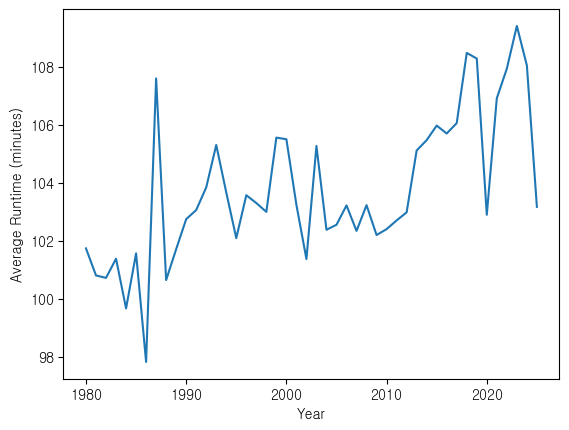

In [4]:
avg_movie_runtime_df = movie_df.groupby('Year').agg(
    avg_runtime = ('Duration_minute', 'mean')
).reset_index()

#avg_movie_runtime_df

sns.lineplot(data=avg_movie_runtime_df, x="Year", y="avg_runtime")
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')


우상향 그래프인 것을 볼 수 있음

## 추세선

<Axes: xlabel='Year', ylabel='avg_runtime'>

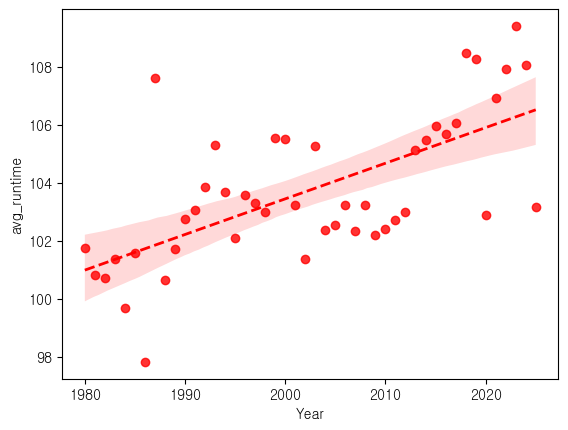

In [5]:
sns.regplot(data=avg_movie_runtime_df, x='Year',y='avg_runtime' ,scatter=True, color='red', line_kws={'linestyle': '--', 'linewidth': 2})

우상향하는 추세선을 볼 수 있음

## 장르별 상영시간 (탑 5개 장르)

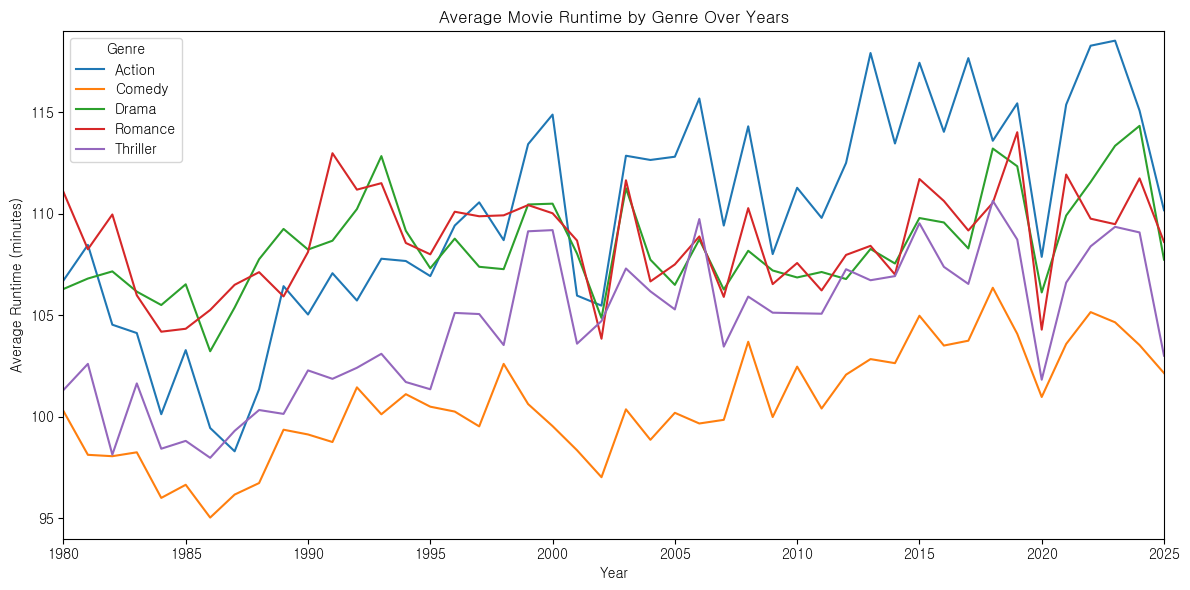

In [6]:
# 장르가 여러개인 영화의 장르들을 풀기
genre_df = movie_df.explode('genres')

# 연도와 장르로 그룹핑한 새 dataframe
genre_year_avg = genre_df.groupby(['Year', 'genres'])['Duration_minute'].mean().reset_index()
genre_year_avg.rename(columns={'genres': 'Genre', 'Duration_minute': 'avg_runtime'}, inplace=True)

# 가장 많은 5개 장르 추출
top_genres = genre_df['genres'].value_counts().head(5).index
filtered_df = genre_year_avg[genre_year_avg['Genre'].isin(top_genres)]

# 플롯
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Year', y='avg_runtime', hue='Genre',)
plt.title('Average Movie Runtime by Genre Over Years')
plt.xlabel('Year')
plt.xlim(1980,2025)
plt.ylim(94, 119)
plt.ylabel('Average Runtime (minutes)')
plt.tight_layout()
plt.show()

액션, 코메디는, 스릴러는 확실한 우상향. 로맨스와 드라마는 잘 모르겠음

## 국가별 상영시간 (탑 5개 국가)

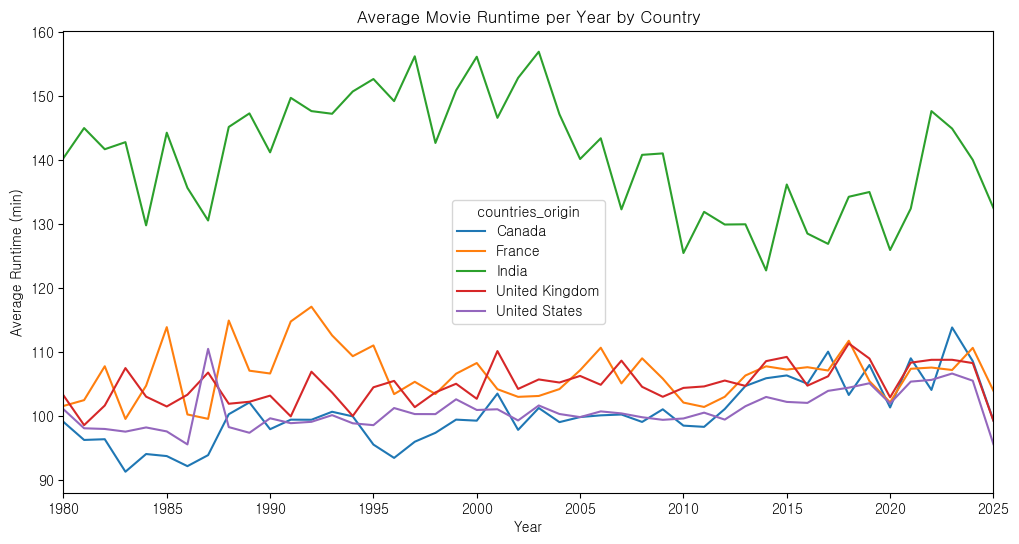

In [7]:
# 장르가 여러개인 영화의 장르들을 풀기
country_df = movie_df.explode('countries_origin')

# 연도와 장르로 그룹핑한 새 dataframe
avg_runtime_by_country_year = country_df.groupby(['countries_origin', 'Year'])['Duration_minute'].mean().reset_index()
avg_runtime_by_country_year.rename(columns={'Duration_minute': 'avg_runtime'}, inplace=True)


# 가장 많은 5개 장르 추출
top_countries = country_df['countries_origin'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_runtime_by_country_year[avg_runtime_by_country_year['countries_origin'].isin(top_countries)],
    x='Year',
    y='avg_runtime',
    hue='countries_origin'
)
plt.title("Average Movie Runtime per Year by Country")
plt.ylabel("Average Runtime (min)")
plt.xlim(1980,2025)
plt.show()

## 상영등급 별 상영시간 (탑 5개 상영등급)

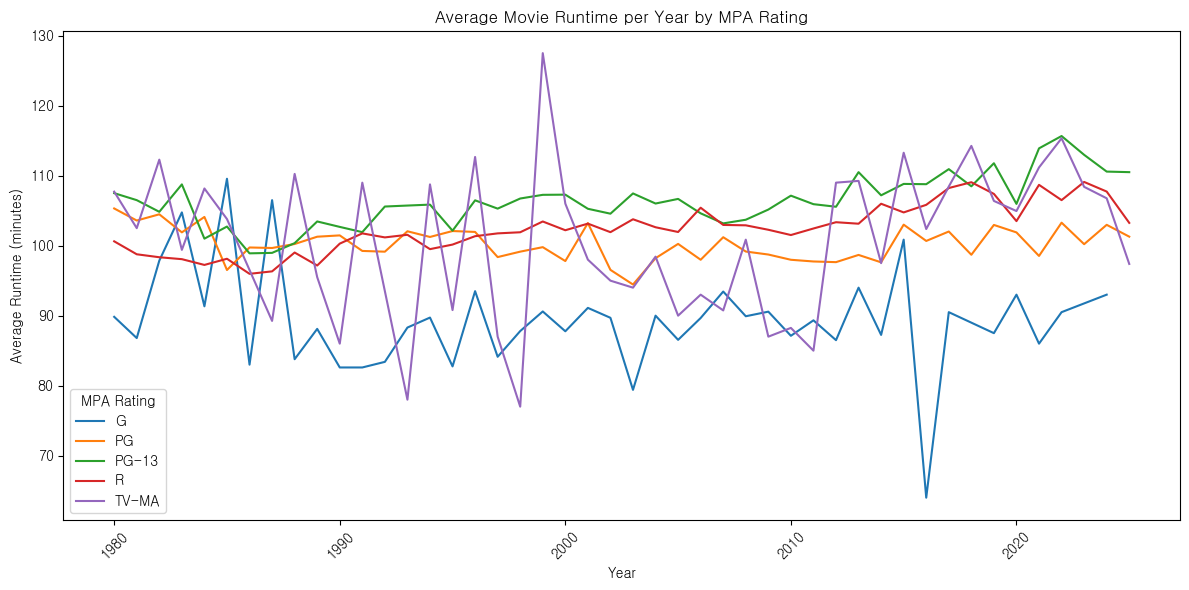

In [8]:
filtered_df = movie_df[movie_df['MPA'] != 'Unrated']

mpa_avg_runtime = filtered_df.groupby(['MPA', 'Year'])['Duration_minute'].mean().reset_index()
mpa_avg_runtime.rename(columns={'Duration_minute': 'avg_runtime'}, inplace=True)


top_mpa = filtered_df['MPA'].value_counts().head(5).index  # You can adjust to head(6), etc.
mpa_avg_runtime = mpa_avg_runtime[mpa_avg_runtime['MPA'].isin(top_mpa)]


plt.figure(figsize=(12, 6))
sns.lineplot(data=mpa_avg_runtime, x='Year', y='avg_runtime', hue='MPA')
plt.title('Average Movie Runtime per Year by MPA Rating')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45)
plt.legend(title='MPA Rating')
plt.tight_layout()
plt.show()


# 예산별 시간 변화 - 달러로 환전하여 결과값 변경

In [9]:
new_df = movie_df[(movie_df['budget'] > '0') & (movie_df['Duration_minute'].notnull())]

In [10]:
import pandas as pd
import numpy as np
import re

# 2025년 7월 기준 환율 적용
rates = {
    'CAD': 1 / 1.36,       # 캐나다 달러 
    'GBP': 1 / 0.741,      # 영국 파운드 
    'EUR': 1 / 0.855,      # 유로 
    'INR': 1 / 86.38,      # 인도 루피 
    'PLN': 1 / 3.94,       # 폴란드 즈워티
    'MXN': 1 / 17.2,       # 멕시코 페소
    'ITL': 1 / 1936.27,    # 이탈리아 리라
    'FRF': 1 / 6.55957,    # 프랑스 프랑
    'USD': 1.0             # 미국 달러
}

# 변환 함수 정의
def convert_to_usd(budget_str):
    if pd.isna(budget_str):
        return np.nan
    budget_str = str(budget_str)
    
    # 통화기호와 숫자 추출
    match = re.search(r'(CA\$|A\$|US\$|\$|£|€|₹|PLN|MX\$|ITL|FRF)?\s*([\d,]+)', budget_str)
    if not match:
        return np.nan
    
    symbol, amount_str = match.groups()
    amount = float(amount_str.replace(',', ''))

    # 통화에 따라 USD로 환산
    if symbol == 'CA$':
        return amount * rates['CAD']
    elif symbol == 'A$':
        return amount * rates['CAD']  
    elif symbol in ('US$', '$', None):
        return amount * rates['USD']
    elif symbol == '£':
        return amount * rates['GBP']
    elif symbol == '€':
        return amount * rates['EUR']
    elif symbol == '₹':
        return amount * rates['INR']
    elif symbol == 'PLN':
        return amount * rates['PLN']
    elif symbol == 'MX$':
        return amount * rates['MXN']
    elif symbol == 'ITL':
        return amount * (1 / 1936.27) * rates['EUR']  
    elif symbol == 'FRF':
        return amount * (1 / 6.55957) * rates['EUR']  
    else:
        return np.nan


In [11]:
# 예산을 전부 USD로 변환하여 budget 컬럼으로 대체
new_df['budget'] = new_df['budget'].apply(convert_to_usd).round().astype('Int64')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28024\28405445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['budget'] = new_df['budget'].apply(convert_to_usd).round().astype('Int64')


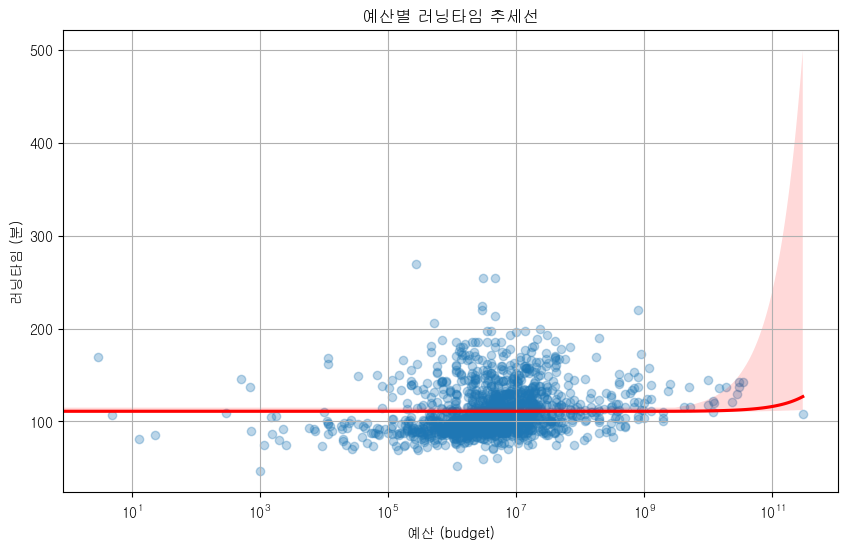

In [12]:
# 시각화
plt.figure(figsize=(10, 6))
sns.regplot(data=new_df, x='budget', y='Duration_minute',
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xscale('log')
plt.title("예산별 러닝타임 추세선")
plt.xlabel("예산 (budget)")
plt.ylabel("러닝타임 (분)")
plt.grid(True)
plt.show()